## 1. Introduction
<p>Everyone loves Lego (unless you ever stepped on one). Did you know by the way that "Lego" was derived from the Danish phrase leg godt, which means "play well"? Unless you speak Danish, probably not. </p>
<p>In this project, we will analyze a fascinating dataset on every single lego block that has ever been built!</p>
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_10/datasets/lego-bricks.jpeg" alt="lego"></p>

In [153]:
# Nothing to do here

In [154]:
%%nose
def test_default():
  assert True

1/1 tests passed


## 2. Reading Data
<p>A comprehensive database of lego blocks is provided by <a href="https://rebrickable.com/downloads/">Rebrickable</a>. The data is available as csv files and the schema is shown below.</p>
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_10/datasets/downloads_schema.png" alt="schema"></p>
<p>Let us start by reading in the colors data to get a sense of the diversity of lego sets!</p>

In [155]:
# Import modules
import pandas as pd

# Read colors data
colors = pd.read_csv('datasets/colors.csv')

# Print the first few rows
colors.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [156]:
%%nose
def test_colors_exists():
    assert 'colors' in globals(), "You should read the data into a variable named `colors`"

1/1 tests passed


## 3. Exploring Colors
<p>Now that we have read the <code>colors</code> data, we can start exploring it! Let us start by understanding the number of colors available.</p>

In [157]:
# How many distinct colors are available?

# Count the number of unique 'rgb' values
num_colors = colors['rgb'].value_counts().sum()

# Print the count
num_colors

135

In [158]:
%%nose
def test_num_colors():
    assert num_colors == 135, "The variable num_colors should equal 135"

1/1 tests passed


## 4. Transparent Colors in Lego Sets
<p>The <code>colors</code> data has a column named <code>is_trans</code> that indicates whether a color is transparent or not. It would be interesting to explore the distribution of transparent vs. non-transparent colors.</p>

In [159]:
# colors_summary: Distribution of colors based on transparency

colors_summary = colors.groupby('is_trans').count()

colors_summary

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


In [160]:
%%nose
def test_colors_summary_exists():
    assert 'colors_summary' in globals(), "You should have defined a variable named `colors_summary`"
def test_colors_summary():
    assert colors_summary.shape == (2, 3), "The DataFrame colors_summary should contain 2 rows and 3 columns"

2/2 tests passed


## 5. Explore Lego Sets
<p>Another interesting dataset available in this database is the <code>sets</code> data. It contains a comprehensive list of sets over the years and the number of parts that each of these sets contained. </p>
<p><img src="https://imgur.com/1k4PoXs.png" alt="sets_data"></p>
<p>Let us use this data to explore how the average number of parts in Lego sets has varied over the years.</p>

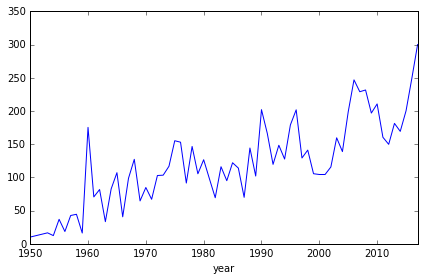

In [161]:
%matplotlib inline

import matplotlib.pyplot as plt

# Read sets data as `sets`
sets = pd.read_csv('datasets/sets.csv')
#sets.head()

# Create a summary of average number of parts by year: `parts_by_year`
parts_by_year = sets.groupby('year')['num_parts'].mean()
#parts_by_year.head()

# Plot trends in average number of parts by year
parts_by_year.plot()
plt.show()


In [162]:
%%nose
def test_sets_exists():
    assert 'sets' in globals(), "You should read the data into a variable named `sets`"
def test_parts_by_year_exists():
    assert 'parts_by_year' in globals(), "You should have defined a variable named `parts_by_year`"

2/2 tests passed


## 6. Lego Themes Over Years
<p>Lego blocks ship under multiple <a href="https://shop.lego.com/en-US/Themes">themes</a>. Let us try to get a sense of how the number of themes shipped has varied over the years.</p>

In [2]:
# themes_by_year: Number of themes shipped by year

# Organizing the sets DataFrame to themes by year
themes_by_year = sets[['year', 'theme_id']].\
  groupby('year', as_index = False).\
  agg({"theme_id": pd.Series.nunique})
themes_by_year.count()

# Printing the head of themes_by_year
themes_by_year.head()

NameError: name 'sets' is not defined

In [164]:
%%nose
def test_themes_by_year_exists():
    assert 'themes_by_year' in globals(), "You should have defined a variable named `themes_by_year`"
def test_themes_by_year():
    assert themes_by_year.shape == (66, 2), "The DataFrame themes_by_year should contain 66 rows and 2 columns"
def test_themes_by_year_names():
    colnames = ['year', 'theme_id']
    assert all(name in themes_by_year for name in colnames), "Your DataFrame, bnames, should have columns named: year, theme_id"

3/3 tests passed


## 7. Wrapping It All Up!
<p>Lego blocks offer an unlimited amount of fun across ages. We explored some interesting trends around colors, parts, and themes. </p>

In [165]:
# Nothing to do here

In [166]:
%%nose
def test_default():
  assert True

1/1 tests passed
